In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def load_matrix(address):
    """Loads data set and returns training set X and output y"""
    data_set = np.loadtxt(address, delimiter=",")
    x, y = data_set[:, :-1], data_set[:, -1]
    y = y.reshape(y.shape[0], 1)
    return x, y

In [3]:
def scatter_plot(address):
    """Plots the data"""
    data_set = np.loadtxt(address, delimiter=",")
    pos, neg = data_set[:,2] == 1, data_set[:,2] == 0
    plt.plot(data_set[pos][:,0], data_set[pos][:,1], '+')
    plt.plot(data_set[neg][:,0], data_set[neg][:,1], 'x')
    plt.legend([ 'y=1', 'y=0'])
    plt.xlabel('Microchip test 1')
    plt.ylabel('Microchip test 2')

In [4]:
def map_feature(x1, x2, m):
    x1 = x1.reshape((m,1))
    x2 = x2.reshape((m,1))
    degree = 6
    new_x = np.ones((m, 1))
    for i in range(1,degree+1,1):
        for j in range(0,i+1,1):
            mid = np.multiply((x1**(i-j)),(x2**j))
            new_x = np.concatenate([new_x, mid],axis=1)
    new_x = new_x[:, 1:]
    return new_x

In [5]:
def initialize_parameters(size):
    """Initializes parameters and bias and returns them"""
    w, b = np.zeros((size, 1)), 0
    return w, b

In [6]:
def sigmoid(x):
    """Compute the sigmoid of x"""
    s = 1/(1+np.exp(-x))
    return s

In [7]:
def predict(x, w, b):
    """Predicts the output based on current weights and biases"""
    predictions = sigmoid(np.dot(x, w)+b)
    return predictions

In [8]:
def compute_cost_grad(x, y, w, b, m, reg):
    h = predict(x, w, b)
    delta = 0.0000000000001
    cost = (-1/m)*np.sum(y*np.log(h+delta)+(1-y)*np.log(1-h+delta)) + (reg/(2*m))*np.sum(w**2)
    dw = (1/m)*np.dot(x.T,(h-y))+(reg/m)*w
    db = (1/m)*np.sum(h-y)
    return cost, dw, db

In [9]:
def gradient_descent(x, y, w, b, m, n, iterations, learn_rate, reg):
    '''Implements gradient descent'''
    J_hist = np.zeros((iterations,2))
    for i in range(iterations):
        J_hist[i][0] = i+1 
        J_hist[i][1], grad_w, grad_b = compute_cost_grad(x, y, w, b, m, reg)
        w = w - learn_rate*grad_w
        b = b - learn_rate*grad_b
    return w, b, J_hist

In [10]:
def plot_cost_history(J_history):
    plt.plot(J_history[:, 0], J_history[:, 1])
    plt.title("Cost History")
    plt.xlabel("Number of iterations")
    plt.ylabel("Cost")

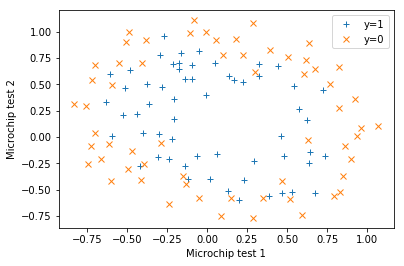

In [24]:
training_set_x, training_set_y = load_matrix("ex2data2.txt")
examples, features = training_set_x.shape[0], training_set_x.shape[1]

learning_rate = 0.01
num_iterations = 40000
parameter = 1
training_set_x = map_feature(training_set_x[:,0], training_set_x[:,1], examples)
features = training_set_x.shape[1]
weight, bias = initialize_parameters(features)

scatter_plot('ex2data2.txt')

In [25]:
cost, grad_w, grad_b = compute_cost_grad(training_set_x, training_set_y, weight, bias, examples, parameter)
print('Cost at initial theta (zeros): ',cost)

print('Gradient at initial theta (zeros): ', grad_w[0:5])

Cost at initial theta (zeros):  0.6931471805597454
Gradient at initial theta (zeros):  [[1.87880932e-02]
 [7.77711864e-05]
 [5.03446395e-02]
 [1.15013308e-02]
 [3.76648474e-02]]


In [26]:
print("Running Gradient Descent...")
weight, bias, J_history = gradient_descent(training_set_x, training_set_y, weight, bias, examples, features, num_iterations, learning_rate, parameter)
print('Parameters found by gradient descent:\nWeight: ', weight)
print('\nBias: ', bias)
print('Final cost: ',J_history[-1][1])

Running Gradient Descent...
Parameters found by gradient descent:
Weight:  [[ 0.62209232]
 [ 1.17784296]
 [-2.01086084]
 [-0.90852208]
 [-1.41396819]
 [ 0.1234925 ]
 [-0.36507051]
 [-0.35892138]
 [-0.17448749]
 [-1.4563797 ]
 [-0.05548084]
 [-0.61388567]
 [-0.27216133]
 [-1.19067541]
 [-0.24131927]
 [-0.2072748 ]
 [-0.04861072]
 [-0.27610141]
 [-0.29424505]
 [-0.4625192 ]
 [-1.04301599]
 [ 0.024114  ]
 [-0.29248112]
 [ 0.01294798]
 [-0.32644414]
 [-0.14224194]
 [-0.93135135]]

Bias:  1.266589216148456
Final cost:  0.5290063402366213


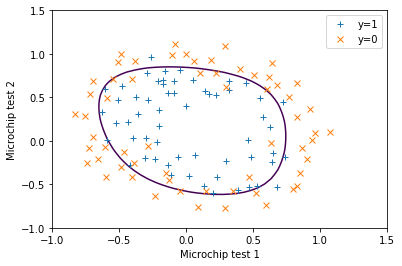

In [27]:
scatter_plot('ex2data2.txt')
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u),len(v)))
for i in range(0, len(u),1):
    for j in range(0, len(v),1):
        z[i,j] = np.dot(map_feature(u[i], v[j], 1), weight)+bias
z = z.T
plt.contour(u, v, z, 0)

In [28]:
predictions = predict(training_set_x, weight, bias)
predictions = predictions>=0.5
predictions = predictions.astype(int)
cnt = 0
for i in range(examples):
    if predictions[i]==training_set_y[i]:
        cnt = cnt+1
print("Count: ",cnt)

Count:  98


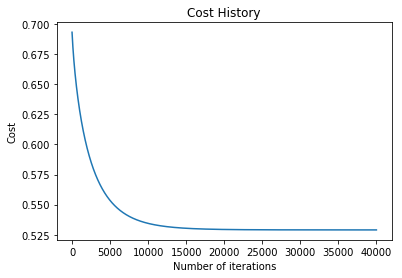

In [29]:
plot_cost_history(J_history)